# Surface Mass Balance: Correlation

Import relevant Libaries 

In [1]:
%pip install pyarrow
%pip install plotly
%pip install feature_engine
%pip update pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "update"
Note: you may need to restart the kernel to use updated packages.


In [57]:
# Base libraries
import pandas as pd
import numpy as np
import os
import math as math
import datetime
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

# Set WD
import os
from pyrsistent import v
os.getcwd()
#os.chdir('/Users/asgerlyngeholst-hansen/Desktop/GEUS-Master-Thesis/')
#os.chdir('C:\\Users\\nifu18ab\\Desktop\\GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/GEUS-Master-Thesis')
#os.chdir('/Users/nilsfulde/Desktop/Master_Thesis')

'c:\\Users\\mabj16ac\\Desktop\\Thesis\\GEUS-Master-Thesis\\scripts'

#### Load KM_L 

In [58]:
df = pd.read_csv('../data//promice/preprocessed/daily/KAN_L.csv')

In [59]:
# This bit to only focus on the time where we see Ice Ablation
df = df[df["Ablation"] == True]

In [70]:
# This bit retrieve the indexes for all melting season categories and remove column from df
for category in ['pre','beginning', 'middle', 'end']:
    exec(f"indices_{category} = df[df['Melting Season'] == '{category}'].index")
    
display(indices)
df_test = df.drop(columns=['Melting Season', 'Ablation', 'Surface height from combined measurements DELTA','Unnamed: 0']) 

Int64Index([  17,   18,  368,  369,  370,  371,  372,  373,  374,  375,
            ...
            5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142],
           dtype='int64', length=240)

#### Correlation and Pairplot 

In [61]:
df_test.columns

Index(['stid', 'Datetime', 'Air pressure (upper boom)',
       'Air temperature (upper boom)',
       'Relative humidity (upper boom) - corrected',
       'Specific humidity (upper boom)', 'Wind speed (upper boom)',
       'Wind from direction (upper boom)',
       'Downwelling shortwave radiation - corrected',
       'Upwelling shortwave radiation - corrected',
       'Downwelling longwave radiation', 'Upwelling longwave radiation',
       'Surface temperature', 'Latent heat flux (upper boom)',
       'Sensible heat flux (upper boom)',
       'Surface height from combined measurements', 'Albedo', 'Cloud cover'],
      dtype='object')

In [62]:
# Do not run

#sns.pairplot(data = exclude, kind='reg')

Text(0.5, 1.0, 'Correlation Heatmap')

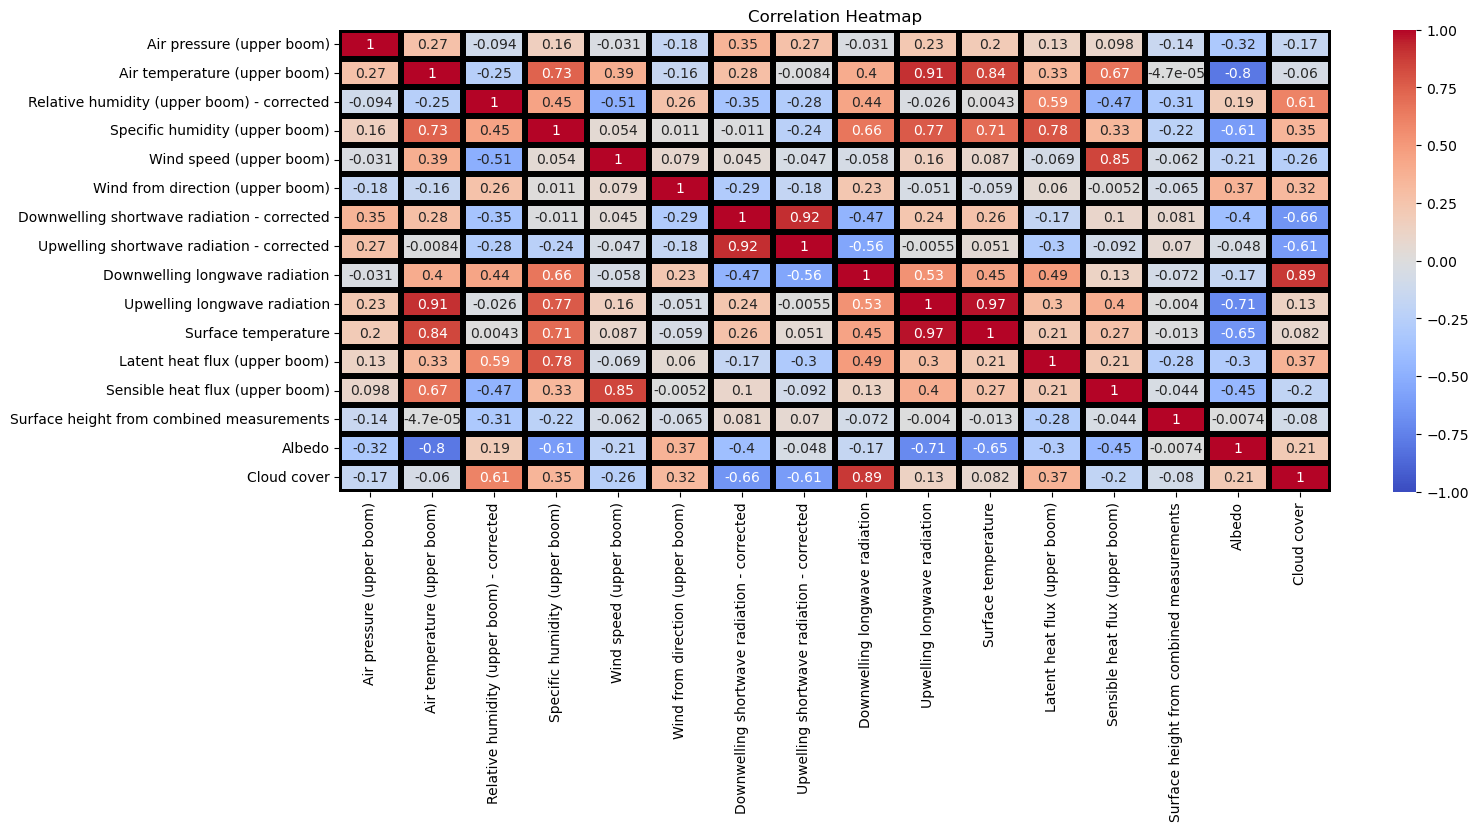

In [65]:
# Heatmap
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df_test.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

heatmap.set_title('Correlation Heatmap')


In [68]:
# Correlation with target variable only

for period in ['pre','beginning', 'middle', 'end']:
    indices = eval(f'indices_{period}')
    df_period = indices.intersection(df_test)
    df_period = df_test.loc[df_period]
    display(indices)
    corr_matrix = df_period.corr()

    display(pd.DataFrame(corr_matrix["Surface height from combined measurements"].sort_values(ascending=False)))

    display(pd.DataFrame(corr_matrix["Surface height from combined measurements"].abs().sort_values(ascending=False)))



Int64Index([], dtype='int64')

,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


Int64Index([   0,    1,    2,  273,  274,  275,  276,  277,  278,  279,
            ...
            5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039],
           dtype='int64', length=243)

,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


Int64Index([   3,    4,   11,   12,   13,   14,   15,   16,  290,  291,
            ...
            5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123],
           dtype='int64', length=1074)

,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


Int64Index([  17,   18,  368,  369,  370,  371,  372,  373,  374,  375,
            ...
            5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142],
           dtype='int64', length=240)

,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


,Surface height from combined measurements
Air pressure (upper boom),NaN
Air temperature (upper boom),NaN
Relative humidity (upper boom) - corrected,NaN
Specific humidity (upper boom),NaN
Wind speed (upper boom),NaN
Wind from direction (upper boom),NaN
Downwelling shortwave radiation - corrected,NaN
Upwelling shortwave radiation - corrected,NaN
Downwelling longwave radiation,NaN
Upwelling longwave radiation,NaN


In [50]:
# Define the periods and the corresponding index names
periods = ['pre', 'beginning', 'middle', 'end']
index_names = [f'indices_{period}' for period in periods]

# Define an empty dataframe to store the results
result_df = pd.DataFrame(columns=['Period', 'Index', 'Value'])

# Loop over the periods
for period in ['pre','beginning', 'middle', 'end']:
    indices = eval(f'indices_{period}')
    df_period = indices.intersection(df_corr)
    
    # Calculate the correlation matrix for the current period
    df_period_corr = df_period.corr()
    
    # Loop over the index names in the correlation matrix
    for index in df_period_corr.index:
        # Loop over the column names in the correlation matrix
        for column in df_period_corr.columns:
            # Add the values to the result dataframe
            result_df = result_df.append({'Period': period, 'Index': f'{index}-{column}', 'Value': df_period_corr.loc[index, column]}, ignore_index=True)

# Set the 'Index' column as the index of the result dataframe
result_df = result_df.set_index('Index')

# Print the result dataframe
print(result_df)

AttributeError: 'Index' object has no attribute 'corr'